In [1]:
from effmass import inputs, outputs
from effmass import extrema


In [10]:
DataCastep = inputs.DataCastep("/Users/lucy/Code/effmass/tests/data_castep/Si_singlespin/","Si")



/Users/lucy/miniconda3/envs/pymatgen/lib/python3.7/site-packages/ase/calculators/castep.py:3073: UserWarning: Generating CASTEP keywords JSON file... hang on.
    The CASTEP keywords JSON file contains abstractions for CASTEP input
    parameters (for both .cell and .param input files), including some
    format checks and descriptions. The latter are extracted from the
    internal online help facility of a CASTEP binary, thus allowing to
    easily keep the calculator synchronized with (different versions of)
    the CASTEP code. Consequently, avoiding licensing issues (CASTEP is
    distributed commercially by accelrys), we consider it wise not to
    provide the file in the first place.
  provide the file in the first place.""")
/Users/lucy/miniconda3/envs/pymatgen/lib/python3.7/site-packages/ase/calculators/castep.py:477: UserWarning: Could not determine the version of your CASTEP binary 
This usually means one of the following 
   * you do not have CASTEP installed 
   * you have

In [3]:
#DataCastep.fermi_energy = 0.5
#DataCastep.find_cbm_vbm()

In [11]:
settings = inputs.Settings(extrema_search_depth=0.5, energy_range=0.25)



In [12]:
segments = extrema.generate_segments(settings,DataCastep)

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

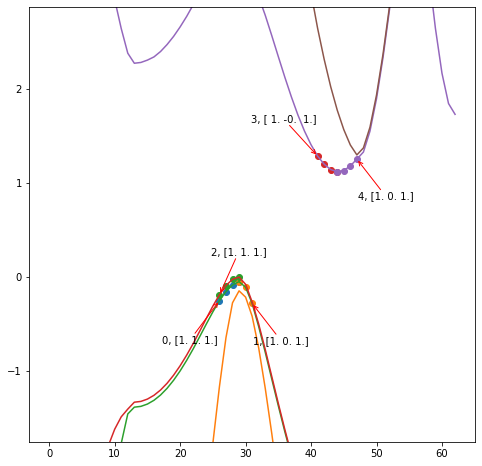

In [13]:
outputs.plot_segments(DataCastep,settings,segments)

In [25]:
segments[4].five_point_leastsq_effmass()# 14 , 111 ---> 0.06: factor of 20 smaller

1.056023196683567

In [8]:
segments[4].five_point_leastsq_effmass()



-0.50066362758232

In [28]:
segments[14].dk_angs

IndexError: list index out of range

In [38]:
import numpy as np
np.array([[1,2],[2,3]])*3

array([[3, 6],
       [6, 9]])

In [88]:
calc.atoms = atoms

In [89]:
bs=calc.band_structure("./tests/data_castep/Si_singlespin/Si.bands")

In [106]:
bs.path.cartesian_kpts()


array([[-2.77555756e-17,  1.85496785e-01,  9.27483927e-02],
       [ 7.13449203e-03,  1.78362293e-01,  9.27483927e-02],
       [ 1.42689841e-02,  1.71227801e-01,  9.27483927e-02],
       [ 2.14034761e-02,  1.64093309e-01,  9.27483927e-02],
       [ 2.85379681e-02,  1.56958817e-01,  9.27483927e-02],
       [ 3.56724602e-02,  1.49824325e-01,  9.27483927e-02],
       [ 4.28069522e-02,  1.42689833e-01,  9.27483927e-02],
       [ 4.99414405e-02,  1.35555345e-01,  9.27483927e-02],
       [ 5.70759326e-02,  1.28420853e-01,  9.27483927e-02],
       [ 6.42104246e-02,  1.21286361e-01,  9.27483927e-02],
       [ 7.13449166e-02,  1.14151869e-01,  9.27483927e-02],
       [ 7.84794087e-02,  1.07017377e-01,  9.27483927e-02],
       [ 8.56139007e-02,  9.98828847e-02,  9.27483927e-02],
       [ 9.27483927e-02,  9.27483927e-02,  9.27483927e-02],
       [ 8.69516182e-02,  8.69516182e-02,  8.69516182e-02],
       [ 8.11548436e-02,  8.11548436e-02,  8.11548436e-02],
       [ 7.53580691e-02,  7.53580691e-02

In [53]:
calc.band_structure?

In [ ]:
calc.